In [1]:
import numpy as np

In [2]:
mode = 3

data_directory = "../DATASET/mode_" + str(mode) + "/downsampling/"

X_train = np.load(data_directory + "X_train.npy")
y_train = np.load(data_directory + "y_train.npy")

X_val = np.load(data_directory + "X_val.npy")
y_val = np.load(data_directory + "y_val.npy")

X_test = np.load(data_directory + "X_test.npy")
y_test = np.load(data_directory + "y_test.npy")

In [3]:
X_train.shape, X_test.shape

((5973, 250, 2), (2480, 250, 2))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 250

model = Sequential()
model.add(Conv1D(64, 10, strides=1, activation='relu', input_shape=(seq_length, 2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 10, strides=1, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Conv1D(128, 10, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 10, strides=1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val), shuffle=True)

Train on 5973 samples, validate on 1474 samples
Epoch 1/200
5973/5973 [==============================] - 5s 864us/step - loss: 0.5058 - acc: 0.7646 - val_loss: 0.9159 - val_acc: 0.5834
Epoch 2/200
5973/5973 [==============================] - 2s 311us/step - loss: 0.3553 - acc: 0.8569 - val_loss: 0.3460 - val_acc: 0.8541
Epoch 3/200
5973/5973 [==============================] - 2s 320us/step - loss: 0.3090 - acc: 0.8828 - val_loss: 0.3500 - val_acc: 0.8521
Epoch 4/200
5973/5973 [==============================] - 2s 308us/step - loss: 0.2792 - acc: 0.8947 - val_loss: 0.5780 - val_acc: 0.7897
Epoch 5/200
5973/5973 [==============================] - 2s 307us/step - loss: 0.2619 - acc: 0.9029 - val_loss: 0.8019 - val_acc: 0.7130
Epoch 6/200
5973/5973 [==============================] - 2s 309us/step - loss: 0.2577 - acc: 0.9034 - val_loss: 0.2682 - val_acc: 0.9077
Epoch 7/200
5973/5973 [==============================] - 2s 316us/step - loss: 0.2412 - acc: 0.9098 - val_loss: 0.3343 - val_acc: 

5973/5973 [==============================] - 2s 306us/step - loss: 0.1735 - acc: 0.9377 - val_loss: 0.2460 - val_acc: 0.9247
Epoch 61/200
5973/5973 [==============================] - 2s 306us/step - loss: 0.1666 - acc: 0.9394 - val_loss: 0.4286 - val_acc: 0.8419
Epoch 62/200
5973/5973 [==============================] - 2s 306us/step - loss: 0.1677 - acc: 0.9409 - val_loss: 0.2417 - val_acc: 0.9193
Epoch 63/200
5973/5973 [==============================] - 2s 306us/step - loss: 0.1626 - acc: 0.9399 - val_loss: 0.4423 - val_acc: 0.8989
Epoch 64/200
5973/5973 [==============================] - 2s 307us/step - loss: 0.1780 - acc: 0.9354 - val_loss: 0.2784 - val_acc: 0.9199
Epoch 65/200
5973/5973 [==============================] - 2s 307us/step - loss: 0.1662 - acc: 0.9397 - val_loss: 0.2656 - val_acc: 0.9240
Epoch 66/200
5973/5973 [==============================] - 2s 307us/step - loss: 0.1693 - acc: 0.9379 - val_loss: 0.3095 - val_acc: 0.9145
Epoch 67/200
5973/5973 [=======================

5973/5973 [==============================] - 2s 321us/step - loss: 0.1024 - acc: 0.9669 - val_loss: 0.4894 - val_acc: 0.9084
Epoch 179/200
5973/5973 [==============================] - 2s 319us/step - loss: 0.0959 - acc: 0.9689 - val_loss: 0.6104 - val_acc: 0.9098
Epoch 180/200
5973/5973 [==============================] - 2s 318us/step - loss: 0.1118 - acc: 0.9650 - val_loss: 0.4776 - val_acc: 0.9057
Epoch 181/200
5973/5973 [==============================] - 2s 317us/step - loss: 0.1008 - acc: 0.9665 - val_loss: 0.4336 - val_acc: 0.9267
Epoch 182/200
5973/5973 [==============================] - 2s 316us/step - loss: 0.1078 - acc: 0.9677 - val_loss: 0.4359 - val_acc: 0.8996
Epoch 183/200
5973/5973 [==============================] - 2s 319us/step - loss: 0.0986 - acc: 0.9669 - val_loss: 0.4029 - val_acc: 0.9009
Epoch 184/200
5973/5973 [==============================] - 2s 317us/step - loss: 0.0802 - acc: 0.9717 - val_loss: 0.5104 - val_acc: 0.8982
Epoch 185/200
5973/5973 [================

In [6]:
score = model.evaluate(X_val, y_val, verbose=1, batch_size=16)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

1474/1474 [==============================] - 0s 240us/step
Validation loss: 0.5650959202070093
Validation accuracy: 0.9172320217096337


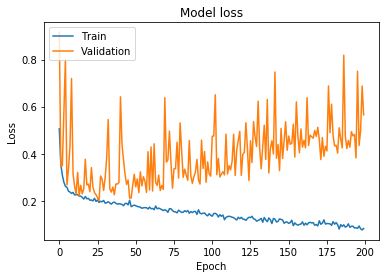

In [8]:
import matplotlib.pyplot as plt 

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
from sklearn.metrics import recall_score, precision_score, fbeta_score

def best_threshold(X_val, y_val):
    predictions = model.predict(X_val)
    
    best_f2 = 0
    for thresh in np.linspace(0.01, 0.99, 100):
        y_val_predict = (predictions > thresh).astype(np.uint8)
        f2 = fbeta_score(y_val, y_val_predict, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_thresh = thresh
    return best_thresh

threshold = best_threshold(X_val, y_val)
y_val_predict = (model.predict(X_val) > threshold).astype(np.uint8)  

print("Validation: ")
print("Threshold: ", threshold)
print("Precision: \t", precision_score(y_val, y_val_predict))
print("Recall: \t", recall_score(y_val, y_val_predict))
print("F2: \t\t", fbeta_score(y_val, y_val_predict, beta=2))

Validation: 
Threshold:  0.0198989898989899
Precision: 	 0.8467336683417085
Recall: 	 0.9711815561959655
F2: 		 0.9434490481522955


In [10]:
model.save("Models/mode_" + str(mode) + "/conv1D.h5")

In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model_mode3.png') 

In [12]:
# TEST
y_test_predict = (model.predict(X_test) > threshold).astype(np.uint8) 
print("TEST: ")
print("Threshold: ", threshold)
print("Precision: \t", precision_score(y_test, y_test_predict))
print("Recall: \t", recall_score(y_test, y_test_predict))
print("F2: \t\t", fbeta_score(y_test, y_test_predict, beta=2))

TEST: 
Threshold:  0.0198989898989899
Precision: 	 0.8426356589147287
Recall: 	 0.9526730937773883
F2: 		 0.9284250085411685
